### Problem Statement

We have a client who has a website where people write different reviews for technical products. Now they are adding a new feature to their website i.e. The reviewer will have to add stars(rating) as well with the review. The rating is out 5 stars and it only has 5 options available 1 star, 2 stars, 3 stars, 4 stars, 5 stars. Now they want to predict ratings for the reviews which were written in the past and they don’t have a rating. So, we have to build an application which can predict the rating by seeing the review.

Model Building Phase


After collecting the data, you need to build a machine learning model. Before model building do all data preprocessing steps involving NLP. Try different models with different hyper parameters and select the best model.
Follow the complete life cycle of data science. Include all the steps like-
1. Data Cleaning
2. Exploratory Data Analysis
3. Data Preprocessing
4. Model Building
5. Model Evaluation
6. Selecting the best model

#### Importing the libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#### Loading the dataset

In [2]:
df=pd.read_csv(r'F:\Internship - Data Science\Rating-Prediction\ratinngs.csv')
df.head()

,Title,Reviews,Helpful Found,Rating
0,Top class product by Xiaomi,Ratings - *****\nDesign - 5\nBuild Quality - 5...,157,5
1,Superb Build Quality and Display is Gorgeous,"No Cons, A good device for productivity",56,5
2,Finally I got my dream spec lap,I am fully satisfied with the purchase. Feelin...,43,5
3,Best in this Price range,"Pros - lovely display, fast fingerprint reader...",32,5
4,Amazing package at this cost!!,"CONS:\nLow sound from speakers, but i mostly u...",26,5


In [3]:
df.tail(10)  #last 10 rows of the dataset

,Title,Reviews,Helpful Found,Rating
3318,Average quality Monitor,Report abuse,7,1
3319,Good,I bought this for my work after lot of resear...,3,1
3320,Not as expected,I encountered a massive screen issue within 6 ...,One,1
3321,Not satisfied,First time i ordered and received broken scree...,5,1
3322,Unsatisfactory viewing angles and contrast,"I got a defected product, I called the custome...",Helpful,1
3323,Cost is more,Display is top-notch - IF IT WORKS.\nBenQ is h...,Helpful,1
3324,small lines comes when montror start,DIRTY WHITE LUMINANCE & FADING / DARKENING OF ...,One,1
3325,Bad color accuracy.,I undertook quite a lot of research to decide ...,One,1
3326,Sound not coming,Report abuse,Helpful,1
3327,After sale service is one important factor to ...,Returned due to build quality,One,1


In [4]:
df.shape  #total rows & columns present in the dataset

(3328, 4)

3328 rows and 4 columns

In [5]:
df.columns  #columns in the dataset

Index(['Title', 'Reviews', 'Helpful Found', 'Rating'], dtype='object')

In [6]:
df.dtypes  #datatypes of each column

Title            object
Reviews          object
Helpful Found    object
Rating            int64
dtype: object

In [7]:
df.nunique()  #total unique values in each column

Title            2695
Reviews          2777
Helpful Found     228
Rating              5
dtype: int64

In [8]:
df.info()  # a brief info about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3328 entries, 0 to 3327
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Title          3319 non-null   object
 1   Reviews        3218 non-null   object
 2   Helpful Found  3328 non-null   object
 3   Rating         3328 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 104.1+ KB


#### Null Values

In [9]:
df.isnull().sum()

Title              9
Reviews          110
Helpful Found      0
Rating             0
dtype: int64

Dataset contains the null values which has to be handled

<AxesSubplot:>

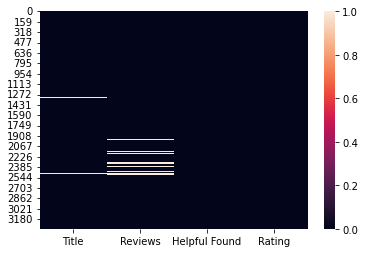

In [10]:
sns.heatmap(df.isnull())   #plotting the null values using heatmap

#### Dropping the null values

In [11]:
df.dropna(axis=0,inplace=True)

In [12]:
df.isnull().sum()

Title            0
Reviews          0
Helpful Found    0
Rating           0
dtype: int64

Hence, no null values are present now.

In [13]:
df.shape

(3210, 4)

3210 rows left after dropping the rows containing null values

<AxesSubplot:xlabel='Rating', ylabel='count'>

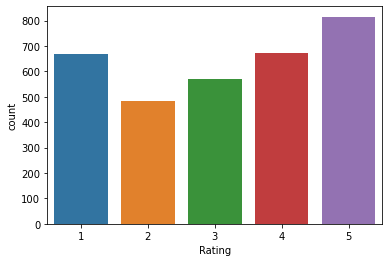

In [14]:
sns.countplot(df['Rating'])

We have most of reviews having rating 5 followed 4 rating, there is no much difference between the ratings so we can go ahead with the data

In [15]:
import re
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
import string
from nltk.stem import WordNetLemmatizer

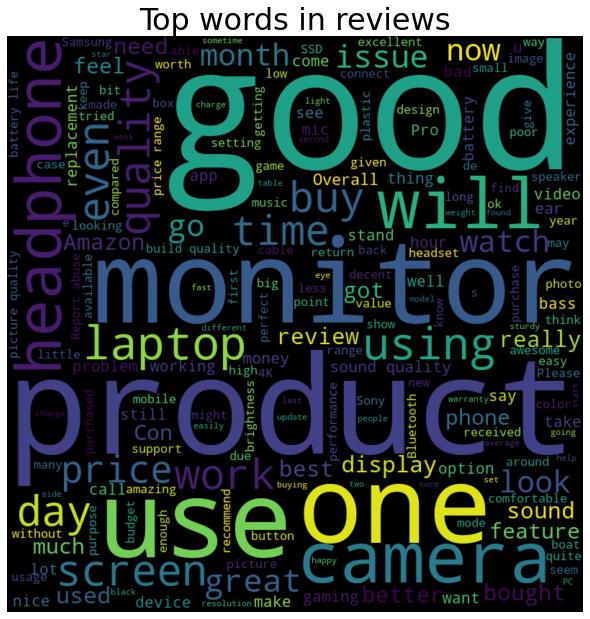

In [16]:
#getting the most appeared words in our dataset

def wordCloud_generator(data, title=None):
    wordcloud = WordCloud(width = 800, height = 800,
                          background_color ='black',
                          min_font_size = 10
                         ).generate(" ".join(data.values))                      
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(title,fontsize=30)
    plt.show()
wordCloud_generator(df['Reviews'], title="Top words in reviews")

Getting the idea of most appearing words

<AxesSubplot:xlabel='Rating', ylabel='Helpful Found'>

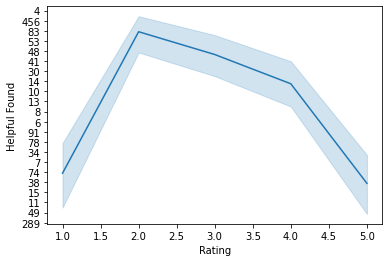

In [17]:
sns.lineplot(df['Rating'],df['Helpful Found'])

Most of the helfuls either goes to lower ratings or to 5 star rating

#### Data Preprocessing

In [18]:
#data preprocessing for review column

# Convert all messages to lower case
df['Reviews'] = df['Reviews'].str.lower()
    
# Replace numbers with 'numbr'
df['Reviews'] = df['Reviews'].str.replace(r'\d+(\.\d+)?', 'numbr')


df['Reviews'] = df['Reviews'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in string.punctuation))

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
df['Reviews'] = df['Reviews'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

lem=WordNetLemmatizer()
df['Reviews'] = df['Reviews'].apply(lambda x: ' '.join(
 lem.lemmatize(t) for t in x.split()))

In [19]:
df.head()

,Title,Reviews,Helpful Found,Rating
0,Top class product by Xiaomi,rating ***** design numbr build quality numbr ...,157,5
1,Superb Build Quality and Display is Gorgeous,"cons, good device productivity",56,5
2,Finally I got my dream spec lap,fully satisfied purchase. feeling like really ...,43,5
3,Best in this Price range,"pro lovely display, fast fingerprint reader, m...",32,5
4,Amazing package at this cost!!,"cons: low sound speakers, mostly use earphone ...",26,5


In [20]:
# Keeping only text with letters a to z, 0 to 9 and words like can't, don't, couldn't etc

from nltk.tokenize import regexp_tokenize
df.Reviews = df.Reviews.apply(lambda x: ' '.join(regexp_tokenize(x,"[a-z']+")))
df.head()

,Title,Reviews,Helpful Found,Rating
0,Top class product by Xiaomi,rating design numbr build quality numbr displa...,157,5
1,Superb Build Quality and Display is Gorgeous,cons good device productivity,56,5
2,Finally I got my dream spec lap,fully satisfied purchase feeling like really p...,43,5
3,Best in this Price range,pro lovely display fast fingerprint reader m o...,32,5
4,Amazing package at this cost!!,cons low sound speakers mostly use earphone th...,26,5


In [21]:
#data preproccessing for title column

# Convert all messages to lower case
df['Title'] = df['Title'].str.lower()
    
# Replace numbers with 'numbr'
df['Title'] = df['Title'].str.replace(r'\d+(\.\d+)?', 'numbr')


df['Title'] = df['Title'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in string.punctuation))

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
df['Title'] = df['Title'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

lem=WordNetLemmatizer()
df['Title'] = df['Title'].apply(lambda x: ' '.join(
 lem.lemmatize(t) for t in x.split()))

df.Title = df.Title.apply(lambda x: ' '.join(regexp_tokenize(x,"[a-z']+")))
df.head()

,Title,Reviews,Helpful Found,Rating
0,top class product xiaomi,rating design numbr build quality numbr displa...,157,5
1,superb build quality display gorgeous,cons good device productivity,56,5
2,finally got dream spec lap,fully satisfied purchase feeling like really p...,43,5
3,best price range,pro lovely display fast fingerprint reader m o...,32,5
4,amazing package cost,cons low sound speakers mostly use earphone th...,26,5


In [22]:
df['Helpful Found']=df['Helpful Found'].replace('One',1) #replacing the 'one' with 1

In [23]:
df['Helpful Found']=df['Helpful Found'].replace('Helpful',1)  #replacing 'helpful' with 1

In [24]:
df['Helpful Found']=df['Helpful Found'].astype(int)  #converting the data type of column into int

In [25]:
df.dtypes

Title            object
Reviews          object
Helpful Found     int32
Rating            int64
dtype: object

#### Statistical Summary

In [26]:
df.describe()

,Helpful Found,Rating
count,3210.000000,3210.00000
mean,27.456386,3.15109
std,133.031273,1.47818
min,1.000000,1.00000
25%,1.000000,2.00000
50%,2.000000,3.00000
75%,10.000000,5.00000
max,4303.000000,5.00000


there is a large difference between 75% and max in helpful columnm i.e. a larger number of outliers are present and also high skewness present in this column

#### Correlation

               Helpful Found    Rating
Helpful Found       1.000000 -0.007083
Rating             -0.007083  1.000000
AxesSubplot(0.125,0.125;0.62x0.755)


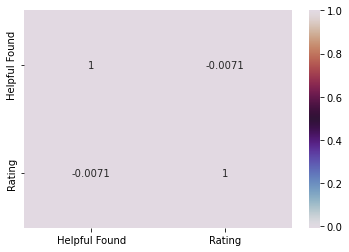

In [27]:
corr=df.corr()
print(corr)
print(sns.heatmap(corr, cmap='twilight',annot=True))

#### Skewness

In [28]:
df.skew()

Helpful Found    16.083277
Rating           -0.175348
dtype: float64

In [29]:
df.drop('Helpful Found',axis=1,inplace=True)  #dropping the column as it is non-relevant to target column

#### Outliers

Rating    AxesSubplot(0.125,0.536818;0.352273x0.343182)
dtype: object

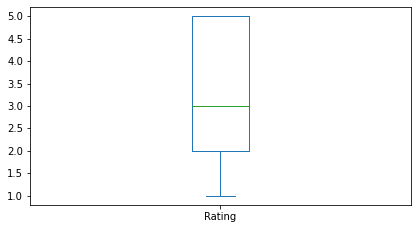

In [30]:
df.plot(kind='box',subplots=True,layout=(2,2),figsize=(15,8))

No outliers present in the dataset

### Model Building

#### Importing the Libraries

In [31]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve,roc_auc_score,auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

#### Converting the text into vectors using TF-IDF

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')
features = tf_vec.fit_transform(df['Reviews'],df['Title'])
x = features

In [33]:
y=df['Rating']

In [34]:
#defining the models 

lg=LogisticRegression()
rdc=RandomForestClassifier()
dtc=DecisionTreeClassifier()
knc=KNeighborsClassifier()
ad=AdaBoostClassifier()
gb=GradientBoostingClassifier()

#### Finding the best random state

In [35]:
model=[lg,rdc,dtc,knc,ad,gb]
maxAccu=0
bestRS=0
for i in range(40,60):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=.30)
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        bestRS=i
print('Best Accuracy score is', maxAccu , 'on random state', bestRS)

Best Accuracy score is 0.3541017653167186 on random state 58


In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=58,test_size=.30)

#### Logistic Regression

In [37]:
lg.fit(x_train,y_train)
pred1=lg.predict(x_test)
acc=accuracy_score(y_test,pred1)
print('Accuracy Score: ',acc)
print('Confusion Matrix: ' ,'\n',confusion_matrix(y_test,pred1))
print('Classification Report: ','\n',classification_report(y_test,pred1))

Accuracy Score:  0.3541017653167186
Confusion Matrix:  
 [[ 58  11  15  35  65]
 [ 25  27  26  27  50]
 [ 24   9  36  34  64]
 [ 22  10  15  69  81]
 [ 36   3  20  50 151]]
Classification Report:  
               precision    recall  f1-score   support

           1       0.35      0.32      0.33       184
           2       0.45      0.17      0.25       155
           3       0.32      0.22      0.26       167
           4       0.32      0.35      0.33       197
           5       0.37      0.58      0.45       260

    accuracy                           0.35       963
   macro avg       0.36      0.33      0.33       963
weighted avg       0.36      0.35      0.34       963



#### Decision Tree Classifier

In [38]:
dtc.fit(x_train,y_train)
pred2=dtc.predict(x_test)
acc=accuracy_score(y_test,pred2)
print('Accuracy Score: ',acc)
print('Confusion Matrix: ' ,'\n',confusion_matrix(y_test,pred2))
print('Classification Report: ','\n',classification_report(y_test,pred2))

Accuracy Score:  0.32502596053997923
Confusion Matrix:  
 [[ 52  17  15  33  67]
 [ 22  35  22  25  51]
 [ 31  17  53  24  42]
 [ 42  21  22  60  52]
 [ 43  17  26  61 113]]
Classification Report:  
               precision    recall  f1-score   support

           1       0.27      0.28      0.28       184
           2       0.33      0.23      0.27       155
           3       0.38      0.32      0.35       167
           4       0.30      0.30      0.30       197
           5       0.35      0.43      0.39       260

    accuracy                           0.33       963
   macro avg       0.33      0.31      0.32       963
weighted avg       0.33      0.33      0.32       963



#### Rabdom Forest Classifier

In [39]:
rdc.fit(x_train,y_train)
pred4=rdc.predict(x_test)
acc=accuracy_score(y_test,pred4)
print('Accuracy Score: ',acc)
print('Confusion Matrix: ' ,'\n',confusion_matrix(y_test,pred4))
print('Classification Report: ','\n',classification_report(y_test,pred4))

Accuracy Score:  0.3509865005192108
Confusion Matrix:  
 [[ 44   9  14  30  87]
 [ 25  28  11  25  66]
 [ 20   5  40  31  71]
 [ 26   6  24  64  77]
 [ 39   7  10  42 162]]
Classification Report:  
               precision    recall  f1-score   support

           1       0.29      0.24      0.26       184
           2       0.51      0.18      0.27       155
           3       0.40      0.24      0.30       167
           4       0.33      0.32      0.33       197
           5       0.35      0.62      0.45       260

    accuracy                           0.35       963
   macro avg       0.38      0.32      0.32       963
weighted avg       0.37      0.35      0.33       963



#### KNN Classifier

In [40]:
knc.fit(x_train,y_train)
pred5=knc.predict(x_test)
acc=accuracy_score(y_test,pred5)
print('Accuracy Score: ',acc)
print('Confusion Matrix: ' ,'\n',confusion_matrix(y_test,pred5))
print('Classification Report: ','\n',classification_report(y_test,pred5))

Accuracy Score:  0.31671858774662515
Confusion Matrix:  
 [[ 20   6   1  66  91]
 [  3  17   0  62  73]
 [  4   0  20  75  68]
 [  3   1   1 103  89]
 [  4   2   3 106 145]]
Classification Report:  
               precision    recall  f1-score   support

           1       0.59      0.11      0.18       184
           2       0.65      0.11      0.19       155
           3       0.80      0.12      0.21       167
           4       0.25      0.52      0.34       197
           5       0.31      0.56      0.40       260

    accuracy                           0.32       963
   macro avg       0.52      0.28      0.26       963
weighted avg       0.49      0.32      0.28       963



#### AdaBoost Classifier

In [41]:
ad.fit(x_train,y_train)
pred3=ad.predict(x_test)
acc=accuracy_score(y_test,pred3)
print('Accuracy Score: ',acc)
print('Confusion Matrix: ' ,'\n',confusion_matrix(y_test,pred3))
print('Classification Report: ','\n',classification_report(y_test,pred3))

Accuracy Score:  0.2824506749740395
Confusion Matrix:  
 [[ 18  14  12  40 100]
 [ 11  24  15  30  75]
 [  8  12  24  34  89]
 [ 10  24  19  44 100]
 [ 13  15  12  58 162]]
Classification Report:  
               precision    recall  f1-score   support

           1       0.30      0.10      0.15       184
           2       0.27      0.15      0.20       155
           3       0.29      0.14      0.19       167
           4       0.21      0.22      0.22       197
           5       0.31      0.62      0.41       260

    accuracy                           0.28       963
   macro avg       0.28      0.25      0.23       963
weighted avg       0.28      0.28      0.25       963



#### GradientBoost Classifer

In [42]:
gb.fit(x_train,y_train)
pred6=gb.predict(x_test)
acc=accuracy_score(y_test,pred6)
print('Accuracy Score: ',acc)
print('Confusion Matrix: ' ,'\n',confusion_matrix(y_test,pred6))
print('Classification Report: ','\n',classification_report(y_test,pred6))

Accuracy Score:  0.3333333333333333
Confusion Matrix:  
 [[ 41   9  18  29  87]
 [ 16  29  18  24  68]
 [ 20  13  40  27  67]
 [ 27  17  17  60  76]
 [ 40   9  22  38 151]]
Classification Report:  
               precision    recall  f1-score   support

           1       0.28      0.22      0.25       184
           2       0.38      0.19      0.25       155
           3       0.35      0.24      0.28       167
           4       0.34      0.30      0.32       197
           5       0.34      0.58      0.43       260

    accuracy                           0.33       963
   macro avg       0.34      0.31      0.31       963
weighted avg       0.34      0.33      0.32       963



#### Multinomial NB

In [43]:
mnb = MultinomialNB()
mnb.fit(x_train,y_train)
pred7=mnb.predict(x_test)
acc=accuracy_score(y_test,pred7)
print('Accuracy Score: ',acc)
print('Confusion Matrix: ' ,'\n',confusion_matrix(y_test,pred7))
print('Classification Report: ','\n',classification_report(y_test,pred7))

Accuracy Score:  0.3426791277258567
Confusion Matrix:  
 [[ 32   1   2  32 117]
 [ 11  10   3  36  95]
 [ 12   2  14  36 103]
 [  7   1   2  69 118]
 [ 11   0   0  44 205]]
Classification Report:  
               precision    recall  f1-score   support

           1       0.44      0.17      0.25       184
           2       0.71      0.06      0.12       155
           3       0.67      0.08      0.15       167
           4       0.32      0.35      0.33       197
           5       0.32      0.79      0.46       260

    accuracy                           0.34       963
   macro avg       0.49      0.29      0.26       963
weighted avg       0.47      0.34      0.28       963



#### Cross Val score

In [44]:
from sklearn.model_selection import cross_val_score
for i in range(3,7):
    cr=cross_val_score(lg,x,y,cv=i)
    cr_mean=cr.mean()
    print("at cv= ", i)
    print('cross val score = ',cr_mean*100)

at cv=  3
cross val score =  23.426791277258566
at cv=  4
cross val score =  29.46568044397102
at cv=  5
cross val score =  29.03426791277258
at cv=  6
cross val score =  28.598130841121495


#### Hypermeter Tuning

In [45]:
from sklearn.model_selection import GridSearchCV
# creating parameters
param={'penalty':['l1', 'l2', 'elasticnet', 'none'],
      'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

GCV=GridSearchCV(lg,param,cv=4,scoring='accuracy')
GCV.fit(x_train,y_train)
GCV.best_params_

{'penalty': 'l2', 'solver': 'liblinear'}

In [46]:
GCV_pred=GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.3561786085150571

#### Saving the model

In [48]:
import pickle
filename='rating.pkl'
pickle.dump(lg,open(filename,'wb'))

#### Conclusion

In [49]:
a=np.array(y_test)
pred=np.array(GCV_pred)
malignant=pd.DataFrame({'Actual':a,'Predicted':pred})
malignant

,Actual,Predicted
0,5,1
1,5,4
2,2,3
3,5,2
4,5,5
...,...,...
958,1,1
959,1,4
960,4,5
961,5,5
